<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/AtribucionMulticanal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Instalamos el paquete de atribución multicanal

In [1]:
pip  install  marketing_attribution_models

In [2]:
from marketing_attribution_models  import  MAM

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Generamos una base de datos 

In [7]:
attributions  =  MAM ( random_df = True )

In [8]:
attributions.DataFrame

,journey_id,channels_agg,converted_agg,conversion_value,time_till_conv_agg
0,id:0_J:0,Google Search > Organic > Google Search > Goog...,True,1,408.0 > 336.0 > 216.0 > 216.0 > 120.0 > 0.0
1,id:0_J:1,Direct > Facebook > Google Search > Google Sea...,True,1,600.0 > 432.0 > 384.0 > 96.0 > 0.0
2,id:0_J:10,Google Search > Facebook > Organic,True,1,72.0 > 0.0 > 0.0
3,id:0_J:11,Organic > Facebook > Direct > Google Search > ...,True,1,1248.0 > 1056.0 > 960.0 > 912.0 > 792.0 > 696....
4,id:0_J:12,Facebook > Organic > Google Search > Organic >...,True,1,1152.0 > 720.0 > 576.0 > 480.0 > 288.0 > 72.0 ...
...,...,...,...,...,...
20578,id:9_J:5,Organic > Direct > Google Search,True,1,144.0 > 48.0 > 0.0
20579,id:9_J:6,Facebook,True,1,0.0
20580,id:9_J:7,Google Search > Google Search > Organic > Goog...,True,1,408.0 > 408.0 > 312.0 > 312.0 > 144.0 > 120.0 ...
20581,id:9_J:8,Google Search,True,1,0.0


In [9]:
attributions.attribution_last_click()
attributions.DataFrame

,journey_id,channels_agg,converted_agg,conversion_value,time_till_conv_agg,attribution_last_click_heuristic
0,id:0_J:0,Google Search > Organic > Google Search > Goog...,True,1,408.0 > 336.0 > 216.0 > 216.0 > 120.0 > 0.0,0 > 0 > 0 > 0 > 0 > 1
1,id:0_J:1,Direct > Facebook > Google Search > Google Sea...,True,1,600.0 > 432.0 > 384.0 > 96.0 > 0.0,0 > 0 > 0 > 0 > 1
2,id:0_J:10,Google Search > Facebook > Organic,True,1,72.0 > 0.0 > 0.0,0 > 0 > 1
3,id:0_J:11,Organic > Facebook > Direct > Google Search > ...,True,1,1248.0 > 1056.0 > 960.0 > 912.0 > 792.0 > 696....,0 > 0 > 0 > 0 > 0 > 0 > 0 > 0 > 0 > 1
4,id:0_J:12,Facebook > Organic > Google Search > Organic >...,True,1,1152.0 > 720.0 > 576.0 > 480.0 > 288.0 > 72.0 ...,0 > 0 > 0 > 0 > 0 > 0 > 1
...,...,...,...,...,...,...
20578,id:9_J:5,Organic > Direct > Google Search,True,1,144.0 > 48.0 > 0.0,0 > 0 > 1
20579,id:9_J:6,Facebook,True,1,0.0,1
20580,id:9_J:7,Google Search > Google Search > Organic > Goog...,True,1,408.0 > 408.0 > 312.0 > 312.0 > 144.0 > 120.0 ...,0 > 0 > 0 > 0 > 0 > 0 > 1
20581,id:9_J:8,Google Search,True,1,0.0,1


In [10]:
attributions.group_by_channels_models

,channels,attribution_last_click_heuristic
0,Direct,2095
1,Email Marketing,1063
2,Facebook,3214
3,Google Display,1077
4,Google Search,4311
5,Instagram,1056
6,Organic,6351
7,Youtube,1011


In [11]:
attributions.attribution_shapley()
attributions.group_by_channels_models

,channels,attribution_last_click_heuristic,attribution_shapley_size4_conv_rate_algorithmic
0,Direct,2095,2119.239047
1,Email Marketing,1063,1088.496936
2,Facebook,3214,3196.823628
3,Google Display,1077,1166.054243
4,Google Search,4311,4292.527373
5,Instagram,1056,1137.628237
6,Organic,6351,6080.885387
7,Youtube,1011,1096.345147


In [12]:
attribution_first_click = attributions.attribution_first_click()

In [13]:
attribution_first_click[0]

0                    [1, 0, 0, 0, 0, 0]
1                       [1, 0, 0, 0, 0]
2                             [1, 0, 0]
3        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4                 [1, 0, 0, 0, 0, 0, 0]
                      ...              
20578                         [1, 0, 0]
20579                               [1]
20580             [1, 0, 0, 0, 0, 0, 0]
20581                               [1]
20582                            [1, 0]
Length: 20583, dtype: object

In [14]:
attribution_first_click[1]


,channels,attribution_first_click_heuristic
0,Direct,2183
1,Email Marketing,1069
2,Facebook,3171
3,Google Display,1095
4,Google Search,4274
5,Instagram,1048
6,Organic,6337
7,Youtube,1001


In [15]:
attributions.attribution_last_click_non(but_not_this_channel='Direct')[1]

,channels,attribution_last_click_non_Direct_heuristic
0,Direct,952
1,Email Marketing,1135
2,Facebook,3408
3,Google Display,1142
4,Google Search,4563
5,Instagram,1124
6,Organic,6766
7,Youtube,1088


In [16]:
attributions.attribution_time_decay(
    decay_over_time=0.6,
    frequency=7)[1]

,channels,attribution_time_decay0.6_freq7_heuristic
0,Direct,2101.938378
1,Email Marketing,1063.756321
2,Facebook,3183.272272
3,Google Display,1087.442748
4,Google Search,4302.524575
5,Instagram,1060.322754
6,Organic,6373.755333
7,Youtube,1004.987619


In [17]:
attribution_markov = attributions.attribution_markov(transition_to_same_state=False)

In [32]:
attributions.attribution_markov(transition_to_same_state=False)

(0        [0.149795259357432, 0.20040948128513608, 0.149...
 1        [0.12034755029745343, 0.168771417126913, 0.212...
 2        [0.31945380467970835, 0.2531523541196213, 0.42...
 3        [0.15516494291398703, 0.09190673048812023, 0.0...
 4        [0.10428977359290145, 0.1760710742304871, 0.13...
                                ...                        
 20578    [0.46086878311345736, 0.19465670174121216, 0.3...
 20579                                                [1.0]
 20580    [0.15256205390517766, 0.15256205390517766, 0.2...
 20581                                                [1.0]
 20582                                           [0.5, 0.5]
 Name: channels, Length: 20583, dtype: object,
           channels  attribution_markov_algorithmic
 0    Google Search                     4114.147297
 1         Facebook                     3260.271307
 2  Email Marketing                     1243.164647
 3          Youtube                     1222.963902
 4   Google Display              

In [22]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [24]:

import seaborn as sns

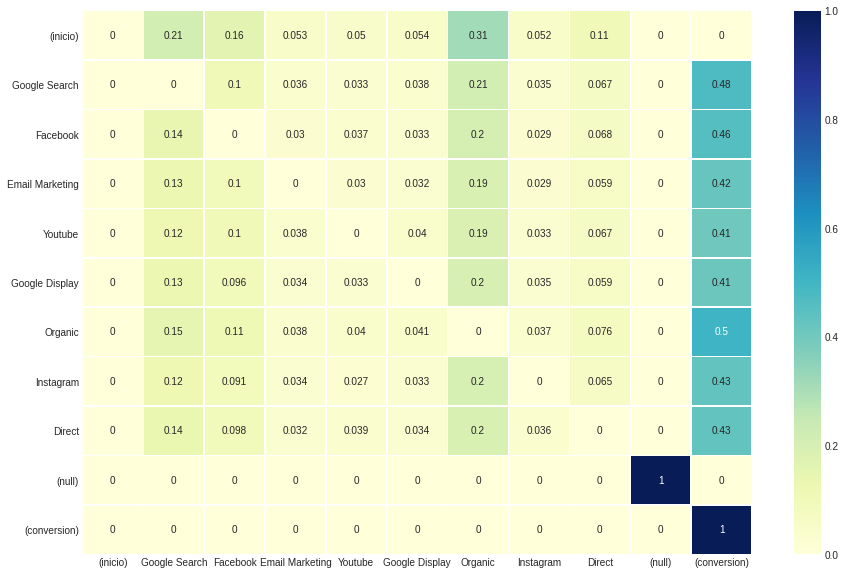

In [25]:
ax, fig = plt.subplots(figsize=(15,10))
sns.heatmap(attribution_markov[2].round(3), cmap="YlGnBu", annot=True, linewidths=.5)

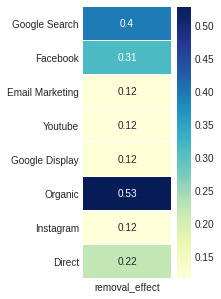

In [33]:
ax, fig = plt.subplots(figsize=(2,5))
sns.heatmap(attribution_markov[3].round(3), cmap="YlGnBu", annot=True, linewidths=.5)

In [34]:
attributions.attribution_shapley(size=4, order=True, values_col='conv_rate')[0]

,combinations,conversions,total_sequences,conversion_value,conv_rate,attribution_shapley_size4_conv_rate_order_algorithmic
0,Direct,952,971,952,0.980433,[952.0]
1,Direct > Email Marketing,36,36,36,1.000000,"[17.965666582549566, 18.034333417450434]"
2,Direct > Email Marketing > Facebook,5,5,5,1.000000,"[1.6545931223875439, 1.701378459311682, 1.6440..."
3,Direct > Email Marketing > Facebook > Google S...,1,1,1,1.000000,"[0.24989904945543137, 0.2534237240182206, 0.24..."
4,Direct > Email Marketing > Facebook > Organic,2,2,2,1.000000,"[0.5020226270730659, 0.5039665040343487, 0.503..."
...,...,...,...,...,...,...
1249,Youtube > Organic > Google Search > Facebook,4,5,4,0.800000,"[1.0202815689313676, 0.9669617389272736, 1.083..."
1250,Youtube > Organic > Instagram,4,4,4,1.000000,"[1.2976355825537838, 1.4252125017383632, 1.277..."
1251,Youtube > Organic > Instagram > Direct,2,2,2,1.000000,"[0.4793682845559065, 0.49403500402011613, 0.54..."
1252,Youtube > Organic > Instagram > Facebook,2,2,2,1.000000,"[0.47452888955536343, 0.49876480760874686, 0.5..."


In [35]:
attributions.attribution_shapley(size=3, order=False, values_col='conversions')[0]

,combinations,conversions,total_sequences,conversion_value,conv_rate,attribution_shapley_size3_conversions_algorithmic
0,Direct,952,971,952,0.980433,[952.0]
1,Direct > Email Marketing,59,61,59,0.967213,"[283.0, -224.0]"
2,Direct > Email Marketing > Facebook,20,21,20,0.952381,"[24.000000000000007, -291.99999999999994, 288.0]"
3,Direct > Email Marketing > Google Display,7,7,7,1.000000,"[182.33333333333334, -81.66666666666669, -93.6..."
4,Direct > Email Marketing > Google Search,43,43,43,1.000000,"[-79.33333333333333, -395.83333333333337, 518...."
...,...,...,...,...,...,...
87,Instagram > Organic > Youtube,197,198,197,0.994949,"[-417.66666666666663, 1061.3333333333333, -446..."
88,Instagram > Youtube,21,22,21,0.954545,"[32.5, -11.5]"
89,Organic,3175,3234,3175,0.981756,[3175.0]
90,Organic > Youtube,253,254,253,0.996063,"[1511.5, -1258.5]"


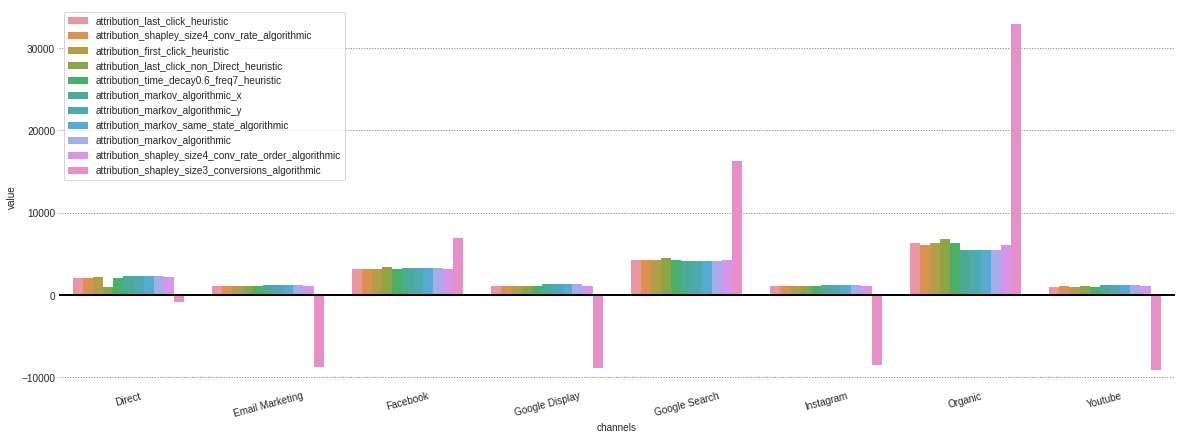

In [36]:
attributions.plot()

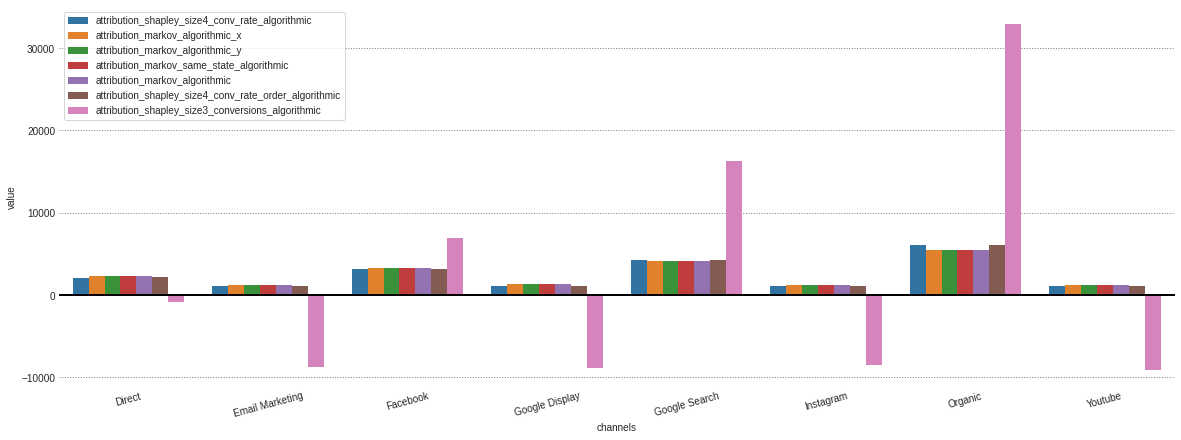

In [37]:
attributions.plot(model_type='algorithmic')